# Información de los atributos

•	sel : orden en el que fueron añadidas las canciones a la playlist 

•	title: Titulo de la canción

•	artist: Artista

•	album: Album

•	genre: Género musical

•	year: Año de lanzamiento

•	bpm: beats per minute (tempo de la canción)

•	nrgy: nivel de energía según spotify, cuanto más alto, más enérgico.

•	dnce: danceability, cuanto mayor sea el valor, más fácil será bailar esta canción.

•	dB: loudness (volumen-ish)

•	live: cuanto mayor sea el valor, más probable es que la canción sea una grabación en vivo.

•	val: cuanto mayor sea el valor, más positivo el estado de ánimo de la canción.

•	dur: duración de la canción --- no lo convertí a segundos por que solo me interesa el orden y no el dato especifico, así que una canción que dura 2 minutos 15 segundos (215) es más corta que una que dura 5 minutos treinta segundos (530) ya que 215<530

•	acous= cuanto mayor sea el valor, más acústica será la canción.

•	spch: cuanto mayor sea el valor, más palabra hablada contiene la canción.

•	pop: cuanto mayor sea el valor, más popular será la canción según spotify.


# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import missingno as msno


import warnings
warnings.filterwarnings("ignore")

# EDA Exploratory Data Analysis

In [2]:
df = pd.read_csv('./Songs_Artist_Sample.csv')
df= df.drop(columns=['sel'])

In [3]:
df.head()

,title,artist,album,track_n,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,lyrics
0,Welcome To New York,Taylor Swift,1989,1.0,Synth Pop,2014,117,63,79,-5,30,62,213,4,3,60,"Walking through a crowd, the village is aglow\..."
1,Blank Space,Taylor Swift,1989,2.0,Electropop,2014,96,70,76,-5,9,57,232,10,5,78,"Nice to meet you, where you been?\nI could sho..."
2,Style,Taylor Swift,1989,3.0,Synth Pop,2014,95,79,59,-6,12,49,231,0,4,70,"Midnight\nYou come and pick me up, no headligh..."
3,Out Of The Woods,Taylor Swift,1989,4.0,Synth Pop,2014,92,84,55,-7,34,34,236,0,4,65,Looking at it now\nIt all seems so simple\nWe ...
4,All You Had To Do Was Stay,Taylor Swift,1989,5.0,Pop,2014,97,74,60,-6,11,47,193,0,3,60,People like you always want back\n The love th...


In [4]:
df.tail()

,title,artist,album,track_n,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,lyrics
3090,La Culpable,Humberto Dozan,NaN,NaN,NaN,2020,94,61,82,-8,17,66,210,19,4,11,NaN
3091,Subliminal,Eva B. Ross,NaN,NaN,NaN,2019,119,49,64,-11,10,39,204,42,5,8,NaN
3092,Girls Just Wanna Have Fun (In the style of Cyn...,AVID All Stars,NaN,NaN,NaN,2008,122,73,68,-11,38,91,182,4,3,7,NaN
3093,Metaphor - Demo,Stereo Fire,NaN,NaN,NaN,2020,175,89,25,-8,17,53,237,0,47,3,NaN
3094,Don't Call Me,SHINee,NaN,NaN,k-pop,2021,82,77,64,-2,7,31,220,1,12,0,NaN


In [5]:
df.shape

(3095, 17)

In [6]:
df['ones']=1

In [7]:
df.groupby('artist')[['ones']].sum().sort_values(by='ones',ascending=False)

,ones
artist,
Taylor Swift,228
Drake,181
Katy Perry,64
Bad Bunny,58
Justin Bieber,38
...,...
Jon Bellion,1
Jonas Blue,1
Jordin Sparks,1


In [8]:
df.groupby('genre')[['ones']].sum().sort_values(by='ones',ascending=False)

,ones
genre,
dance pop,531
latin,200
canadian hip hop,183
album rock,82
alternative rock,75
...,...
experimental techno,1
flamenco,1
float house,1


<AxesSubplot:>

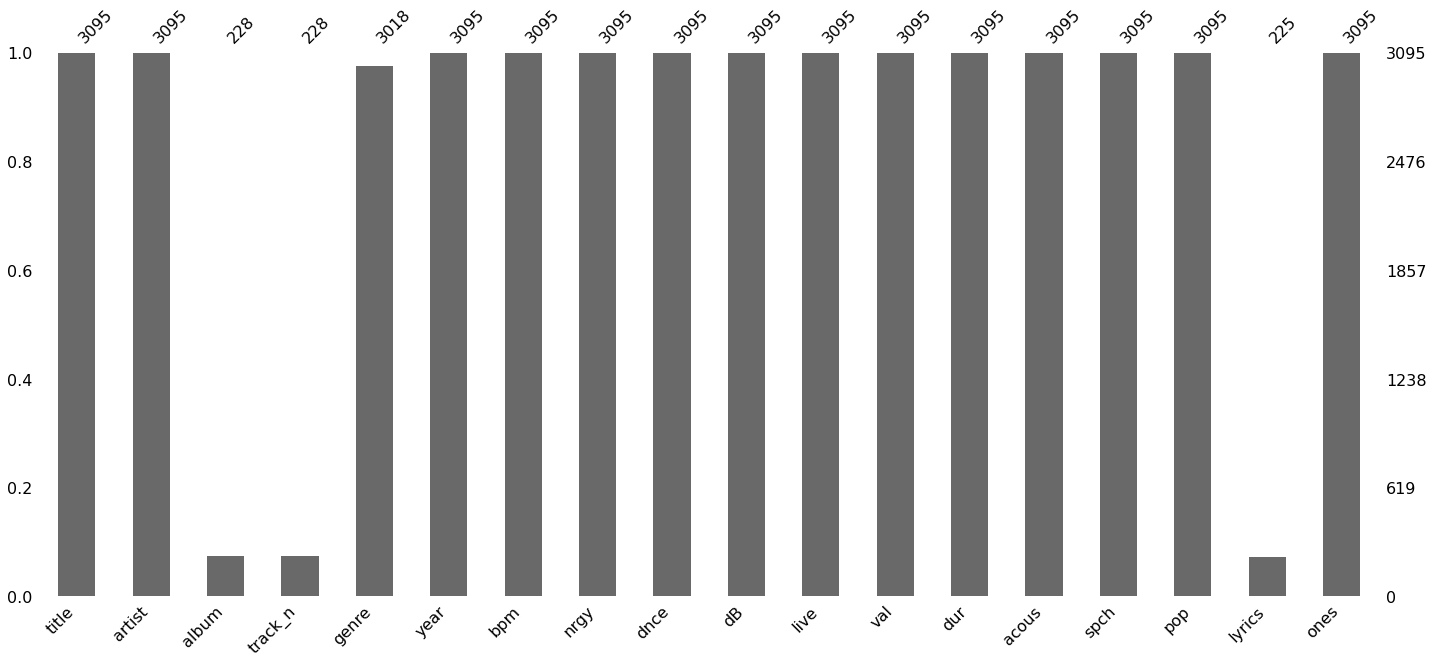

In [9]:
msno.bar(df) #eliminare album, track_n, lyrics

In [10]:
df= df.drop(columns=['album'])
df= df.drop(columns=['track_n'])
df= df.drop(columns=['lyrics'])

Transforma la variable del año y obtiene la década a la que corresponde

In [11]:
sns.color_palette("Set2") ##este es mi fav 

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

<AxesSubplot:xlabel='decade', ylabel='count'>

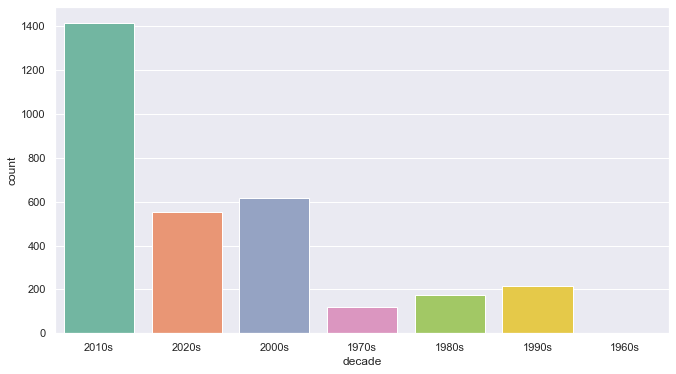

In [12]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df['decade'],palette="Set2")

In [13]:
df['genre'].unique() #Imprime todos los valores únicos

array(['Synth Pop', 'Electropop', 'Pop', 'dance pop', 'Dream Pop',
       'Musicals', 'Alternative Pop', 'Country Pop', 'Country',
       'Contemporary Country', 'Country Rock', 'Pop Rock',
       'Alternative Country', 'Alternative Rock', 'Soft Rock', 'Folk Pop',
       'R&B', 'pop', 'canadian contemporary r&b', 'cali rap',
       'trap latino', 'australian hip hop', 'latin', 'big room', nan,
       'brooklyn drill', 'canadian pop', 'electropop', 'k-pop', 'edm',
       'north carolina hip hop', 'colombian pop', 'bedroom pop',
       'country rap', 'canadian hip hop', 'modern alternative rock',
       'pop rap', 'rap', 'australian pop', 'melodic rap', 'dfw rap',
       'sad rap', 'latin pop', 'reggaeton', 'modern rock', 'emo rap',
       'garage rock', 'neo soul', 'argentine hip hop', 'album rock',
       'houston rap', 'alternative r&b', 'dutch pop', 'australian psych',
       'cubaton', 'tropical house', 'permanent wave', 'indie pop',
       'forro', 'german dance', 'pop dance', 'con

In [14]:
df.isnull().sum()

title      0
artist     0
genre     77
year       0
bpm        0
nrgy       0
dnce       0
dB         0
live       0
val        0
dur        0
acous      0
spch       0
pop        0
ones       0
decade     0
dtype: int64

In [15]:
df['genre'] = df['genre'].fillna('dance pop')

In [16]:
df.isnull().sum()

title     0
artist    0
genre     0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
ones      0
decade    0
dtype: int64

Subsets:

In [17]:
year_df=df[['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']] ##para ayudar en el analisis

In [18]:
genre_df=df[['genre','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]

In [19]:
features_df=df[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]

In [20]:
artist_df=df[['artist','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]

In [21]:
df["val"].describe()

count    3095.000000
mean       49.672052
std        23.612760
min         4.000000
25%        31.000000
50%        49.000000
75%        68.000000
max        98.000000
Name: val, dtype: float64

Text(0.5, 1.0, 'que tan positiva es la musica por decada')

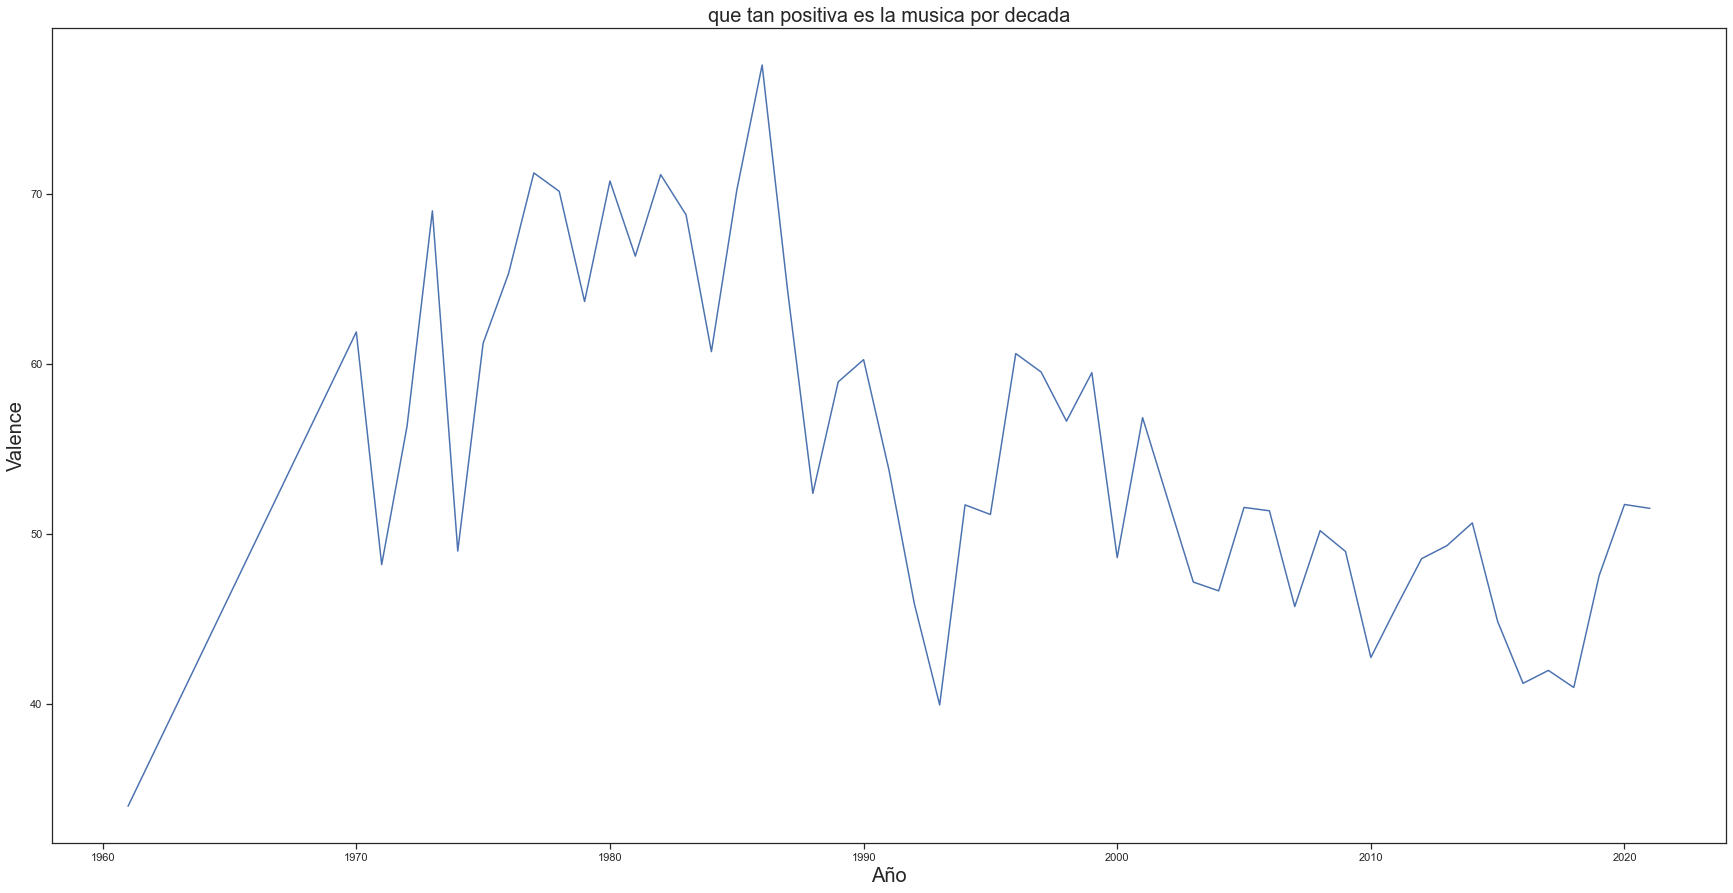

In [67]:
plt.figure(figsize=(30,15))
sns.set_style("ticks")
ax = df.groupby(['year'])['val'].mean().plot(kind='line')

ax.set_xlabel("Año", fontsize=20)
ax.set_ylabel("Valence", fontsize=20)
ax.set_title('que tan positiva es la musica por decada', fontsize=20)

In [23]:
df["dur"].describe()

count    3095.000000
mean      226.519225
std        51.878079
min        61.000000
25%       194.000000
50%       221.000000
75%       250.000000
max       629.000000
Name: dur, dtype: float64

Text(0.5, 1.0, 'que tan largas son las canciones')

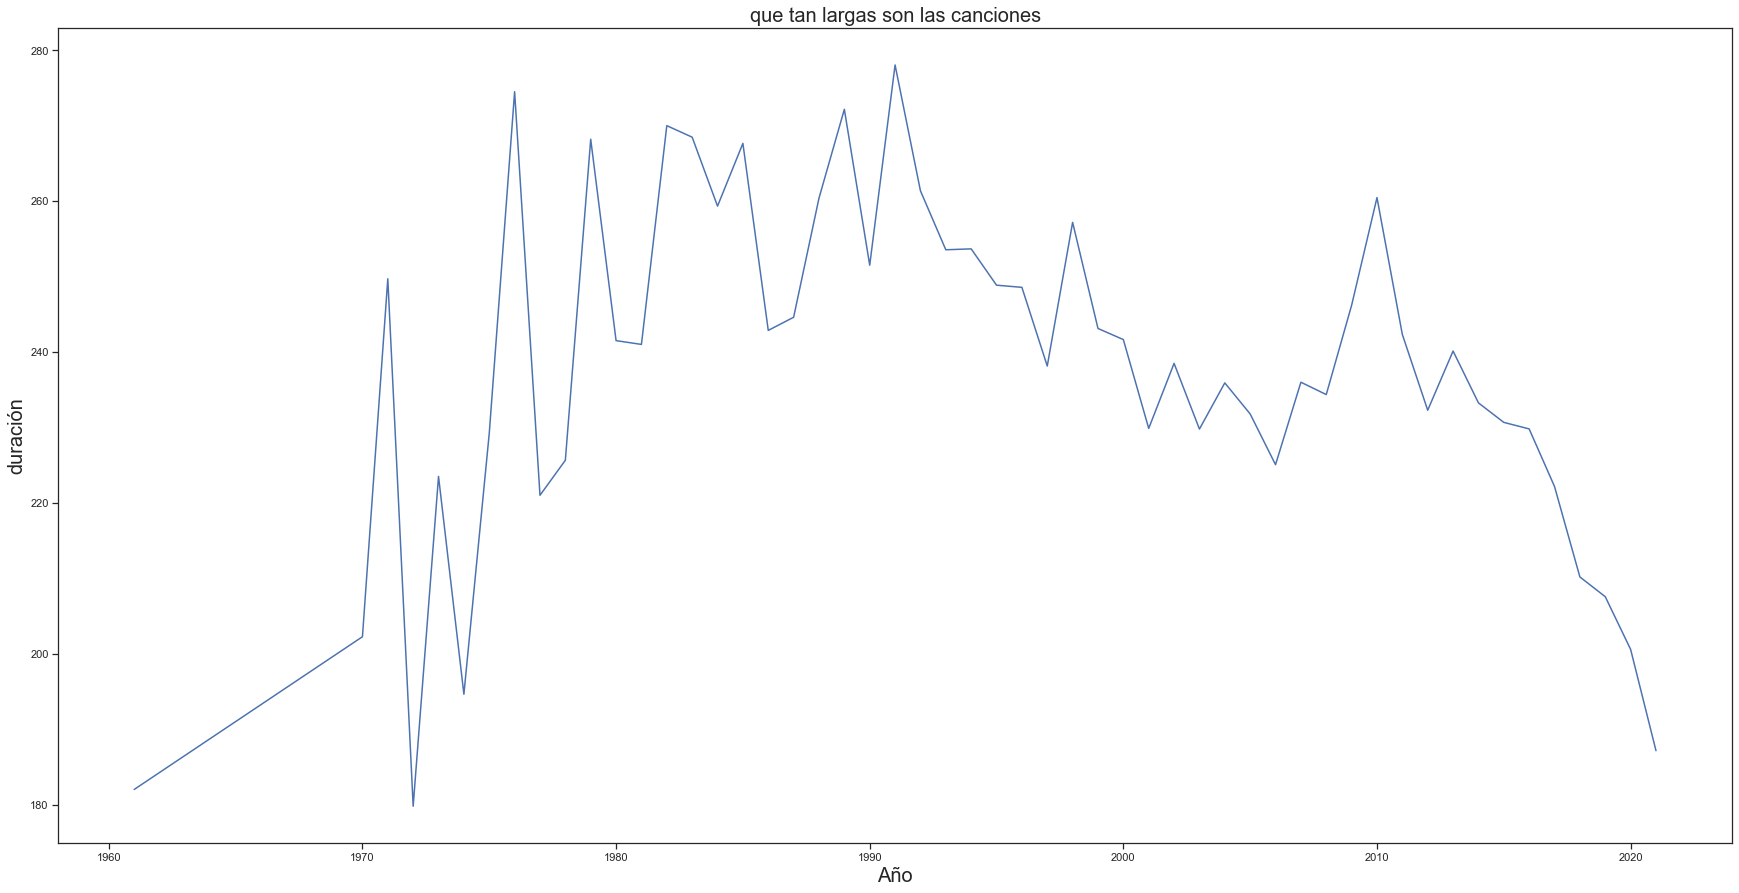

In [68]:
plt.figure(figsize=(30,15))
sns.set_style("ticks")
ax = df.groupby(['year'])['dur'].mean().plot(kind='line')

ax.set_xlabel("Año", fontsize=20)
ax.set_ylabel("duración", fontsize=20)
ax.set_title('que tan largas son las canciones', fontsize=20)

Text(0.5, 1.0, 'que tan energeticas')

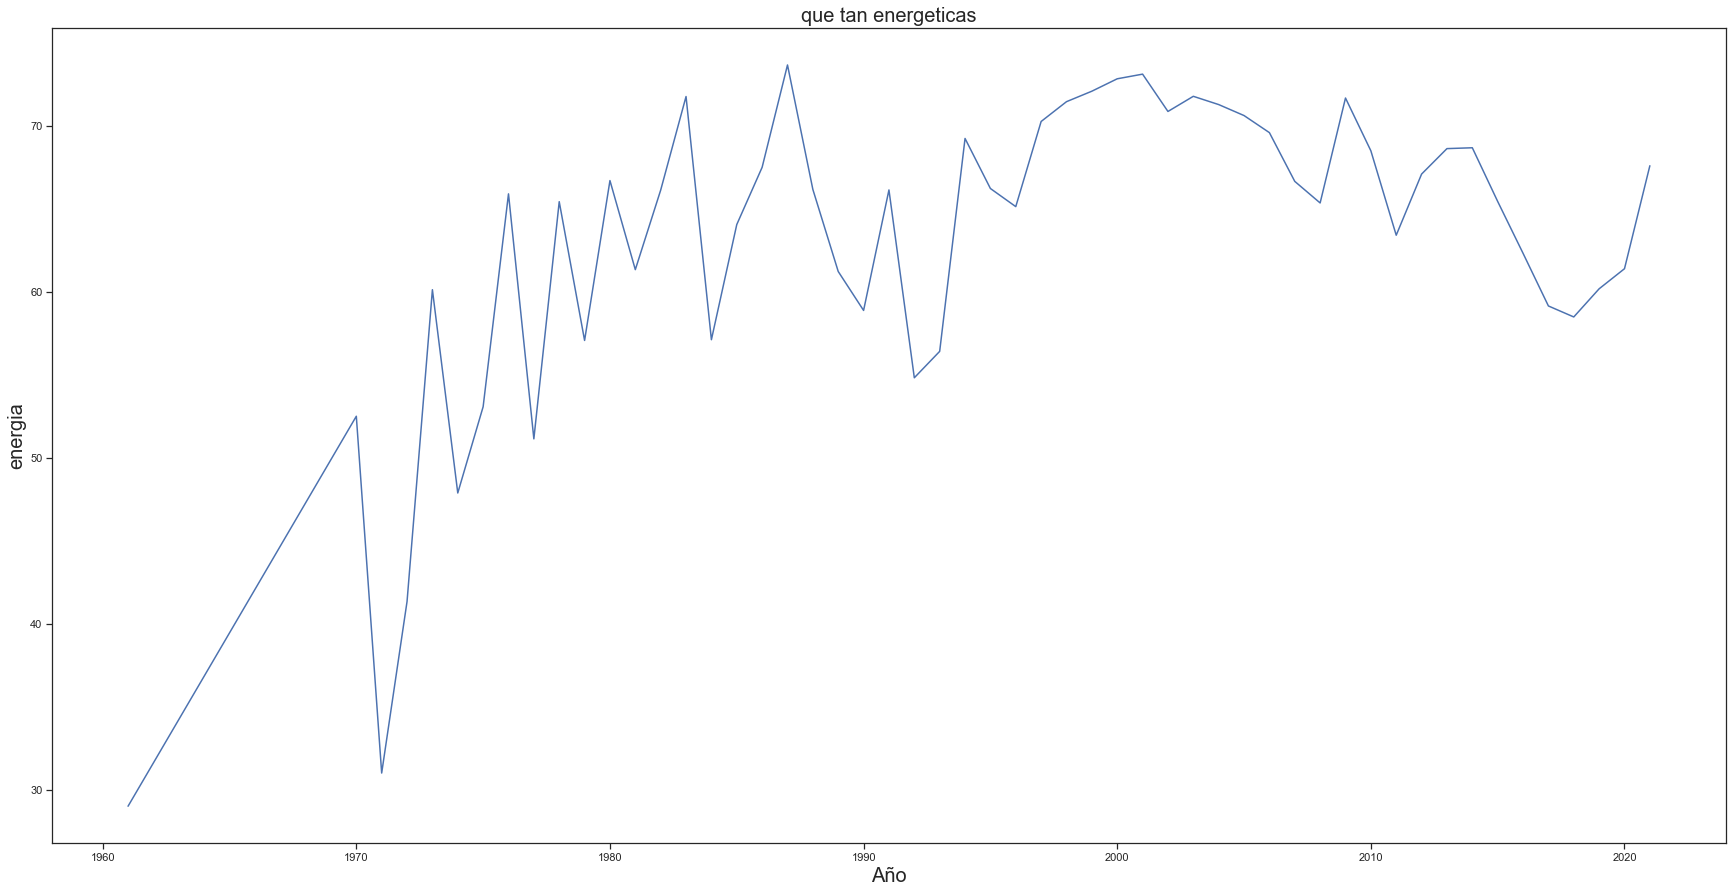

In [69]:
plt.figure(figsize=(30,15))
sns.set_style("ticks")
ax = df.groupby(['year'])['nrgy'].mean().plot(kind='line')

ax.set_xlabel("Año", fontsize=20)
ax.set_ylabel("energia", fontsize=20)
ax.set_title('que tan energeticas', fontsize=20)

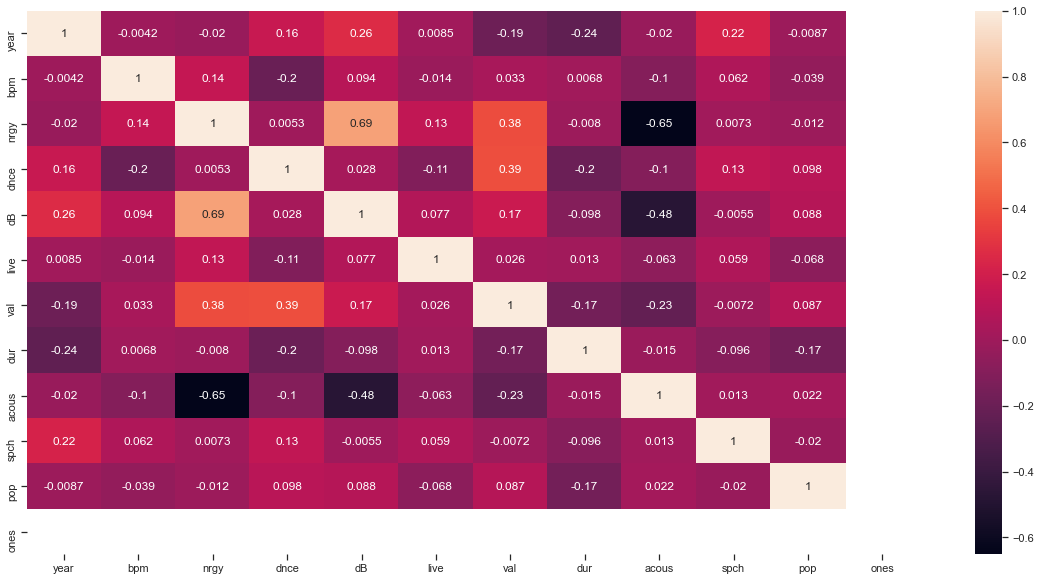

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [28]:
df.corr(method ='kendall') 

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones
year,1.000000,-0.021067,-0.072064,0.158758,0.084059,0.006932,-0.079968,-0.260114,0.054176,0.259104,0.077490,NaN
bpm,-0.021067,1.000000,0.102737,-0.115307,0.067149,0.010696,0.020975,0.013918,-0.089079,0.069721,-0.035149,NaN
nrgy,-0.072064,0.102737,1.000000,-0.017277,0.514660,0.075901,0.259380,-0.015506,-0.434680,0.115891,-0.010278,NaN
dnce,0.158758,-0.115307,-0.017277,1.000000,-0.010253,-0.089311,0.273707,-0.140245,-0.001243,0.156490,0.083574,NaN
dB,0.084059,0.067149,0.514660,-0.010253,1.000000,0.067074,0.138572,-0.092986,-0.298524,0.078406,0.058057,NaN
live,0.006932,0.010696,0.075901,-0.089311,0.067074,1.000000,-0.009340,-0.019461,-0.030401,0.026600,-0.034373,NaN
val,-0.079968,0.020975,0.259380,0.273707,0.138572,-0.009340,1.000000,-0.116848,-0.118068,0.055386,0.062787,NaN
dur,-0.260114,0.013918,-0.015506,-0.140245,-0.092986,-0.019461,-0.116848,1.000000,-0.006463,-0.156158,-0.106373,NaN
acous,0.054176,-0.089079,-0.434680,-0.001243,-0.298524,-0.030401,-0.118068,-0.006463,1.000000,-0.052980,0.030988,NaN
spch,0.259104,0.069721,0.115891,0.156490,0.078406,0.026600,0.055386,-0.156158,-0.052980,1.000000,0.039963,NaN


In [29]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones
count,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.0
mean,2009.644911,121.473021,64.252989,61.843296,-7.038772,17.816155,49.672052,226.519225,23.035864,7.628433,62.832956,1.0
std,11.856511,27.924832,19.380390,14.518550,3.008786,14.343131,23.612760,51.878079,26.693168,8.579012,13.681158,0.0
min,1961.000000,48.000000,2.000000,6.000000,-25.000000,2.000000,4.000000,61.000000,0.000000,2.000000,0.000000,1.0
25%,2005.000000,100.000000,50.000000,52.000000,-9.000000,9.000000,31.000000,194.000000,2.000000,3.000000,55.000000,1.0
50%,2014.000000,120.000000,67.000000,63.000000,-6.000000,12.000000,49.000000,221.000000,11.000000,4.000000,65.000000,1.0
75%,2019.000000,138.000000,80.000000,72.000000,-5.000000,21.000000,68.000000,250.000000,36.000000,7.000000,72.000000,1.0
max,2021.000000,218.000000,100.000000,98.000000,-1.000000,98.000000,98.000000,629.000000,99.000000,91.000000,100.000000,1.0


In [30]:
genre_df.groupby('genre').mean()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
genre,,,,,,,,,,
Alternative Country,96.000000,38.000000,59.000000,-9.000000,10.00000,50.000000,295.000000,60.000000,3.000000,73.000000
Alternative Pop,118.100000,41.420000,54.640000,-10.360000,12.22000,37.200000,238.660000,79.520000,4.560000,67.200000
Alternative Rock,126.250000,57.250000,54.250000,-7.750000,8.25000,27.750000,270.000000,23.250000,3.000000,57.250000
Contemporary Country,130.100000,58.100000,52.300000,-5.600000,19.00000,40.600000,255.200000,24.700000,3.000000,52.800000
Country,125.434783,60.760870,51.021739,-6.369565,36.76087,35.978261,258.086957,33.543478,3.869565,43.086957
...,...,...,...,...,...,...,...,...,...,...
uk pop,117.666667,48.333333,66.333333,-7.333333,21.00000,40.666667,186.666667,56.333333,18.333333,45.666667
ukrainian electronic,102.000000,88.000000,74.000000,-3.000000,8.00000,64.000000,174.000000,7.000000,3.000000,71.000000
vapor trap,126.000000,63.000000,67.000000,-6.000000,35.00000,68.000000,140.000000,5.000000,7.000000,68.000000


<AxesSubplot:xlabel='spch', ylabel='Density'>

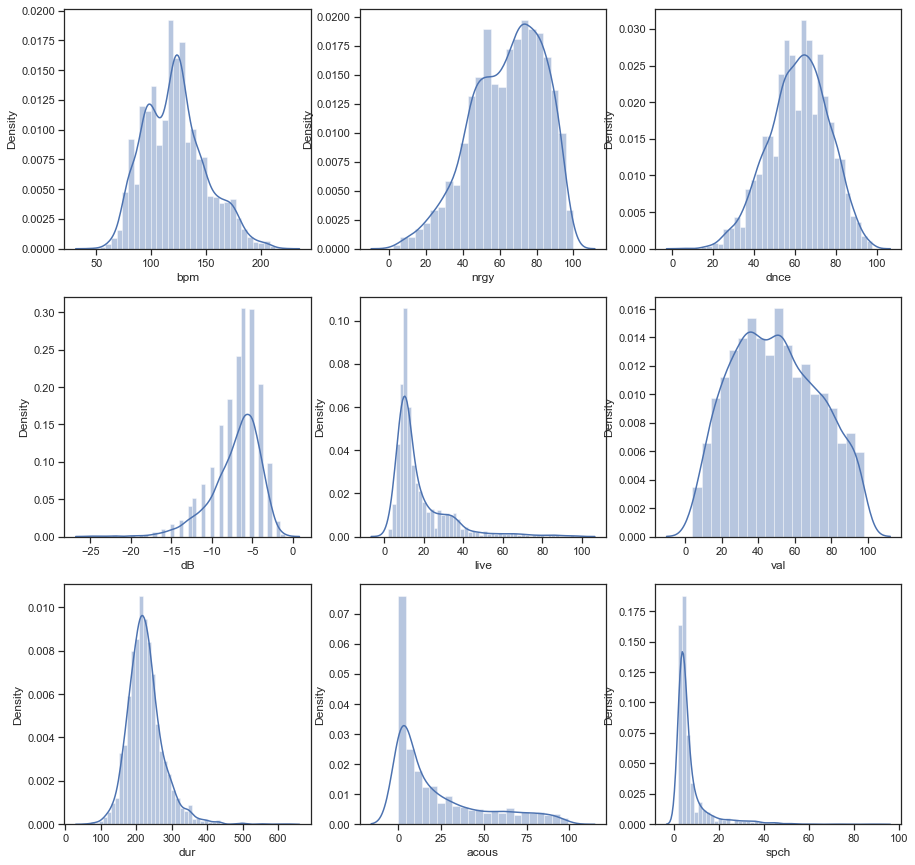

In [31]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
sns.distplot(df.bpm)

fig.add_subplot(3,3,2)
sns.distplot(df.nrgy)

fig.add_subplot(3,3,3)
sns.distplot(df.dnce)

fig.add_subplot(3,3,4)
sns.distplot(df.dB)

fig.add_subplot(3,3,5)
sns.distplot(df.live)

fig.add_subplot(3,3,6)
sns.distplot(df.val)

fig.add_subplot(3,3,7)
sns.distplot(df.dur)

fig.add_subplot(3,3,8)
sns.distplot(df.acous)

fig.add_subplot(3,3,9)
sns.distplot(df.spch)

# Subset con la música solo de Taylor

In [34]:
df_taylor= df[(df['artist'] == 'Taylor Swift')]

In [35]:
df_taylor

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones,decade
0,Welcome To New York,Taylor Swift,Synth Pop,2014,117,63,79,-5,30,62,213,4,3,60,1,2010s
1,Blank Space,Taylor Swift,Electropop,2014,96,70,76,-5,9,57,232,10,5,78,1,2010s
2,Style,Taylor Swift,Synth Pop,2014,95,79,59,-6,12,49,231,0,4,70,1,2010s
3,Out Of The Woods,Taylor Swift,Synth Pop,2014,92,84,55,-7,34,34,236,0,4,65,1,2010s
4,All You Had To Do Was Stay,Taylor Swift,Pop,2014,97,74,60,-6,11,47,193,0,3,60,1,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,epiphany - the long pond studio sessions,Taylor Swift,Alternative Pop,2020,94,20,52,-13,7,11,275,92,3,52,1,2020s
224,betty - the long pond studio sessions,Taylor Swift,Alternative Pop,2020,96,32,54,-9,12,52,290,84,3,53,1,2020s
225,peace - the long pond studio sessions,Taylor Swift,Alternative Pop,2020,150,34,62,-11,7,51,214,93,6,52,1,2020s
226,hoax - the long pond studio sessions,Taylor Swift,Alternative Pop,2020,119,16,68,-13,18,48,222,96,4,52,1,2020s


In [36]:
df_taylor.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0
mean,2014.048246,121.026316,56.153509,57.399123,-7.543860,21.425439,40.241228,239.052632,37.456140,5.925439,57.030702,1.0
std,5.036636,31.753167,20.531873,12.287790,2.913255,23.012899,19.058423,47.167868,34.691882,9.278779,14.610175,0.0
min,2006.000000,58.000000,12.000000,24.000000,-18.000000,3.000000,5.000000,83.000000,0.000000,2.000000,0.000000,1.0
25%,2010.000000,95.000000,41.000000,50.000000,-9.000000,10.000000,25.000000,211.000000,4.750000,3.000000,47.000000,1.0
50%,2014.000000,119.000000,57.500000,59.000000,-7.000000,12.000000,39.000000,234.500000,20.500000,4.000000,56.000000,1.0
75%,2020.000000,144.000000,73.000000,65.000000,-5.000000,19.250000,53.000000,260.000000,73.250000,5.000000,69.000000,1.0
max,2021.000000,207.000000,94.000000,90.000000,-2.000000,98.000000,94.000000,405.000000,97.000000,91.000000,86.000000,1.0


In [37]:
df_taylor["val"].describe()

count    228.000000
mean      40.241228
std       19.058423
min        5.000000
25%       25.000000
50%       39.000000
75%       53.000000
max       94.000000
Name: val, dtype: float64

<AxesSubplot:xlabel='decade', ylabel='count'>

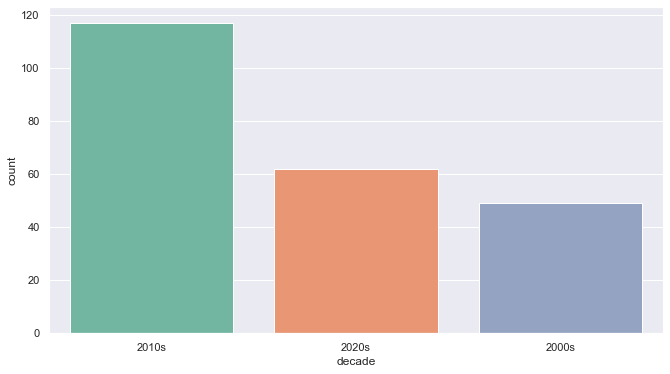

In [38]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df_taylor['decade'],palette="Set2")

In [39]:
XtoPredict = df_taylor.loc[df_taylor['genre'].isnull(),:].reset_index(drop=True)
FeatureGenre_taylor = df_taylor.loc[df_taylor['genre'].notnull(),:].reset_index(drop=True)
FeatureGenre_taylor.head()

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones,decade
0,Welcome To New York,Taylor Swift,Synth Pop,2014,117,63,79,-5,30,62,213,4,3,60,1,2010s
1,Blank Space,Taylor Swift,Electropop,2014,96,70,76,-5,9,57,232,10,5,78,1,2010s
2,Style,Taylor Swift,Synth Pop,2014,95,79,59,-6,12,49,231,0,4,70,1,2010s
3,Out Of The Woods,Taylor Swift,Synth Pop,2014,92,84,55,-7,34,34,236,0,4,65,1,2010s
4,All You Had To Do Was Stay,Taylor Swift,Pop,2014,97,74,60,-6,11,47,193,0,3,60,1,2010s


<AxesSubplot:xlabel='spch', ylabel='Density'>

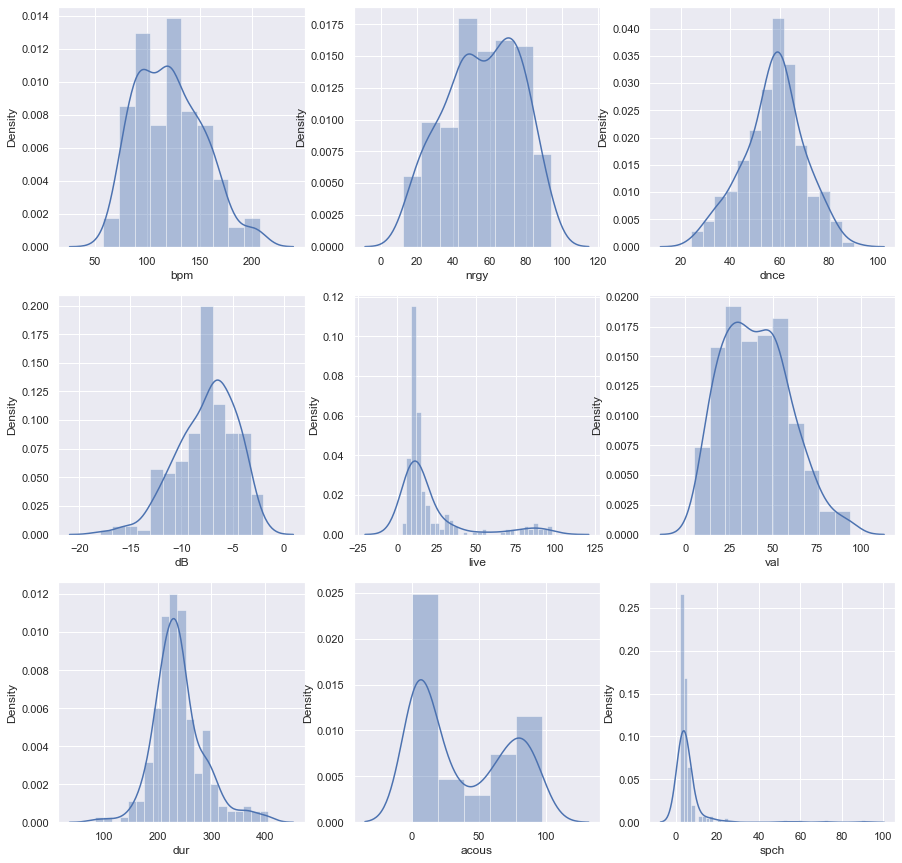

In [40]:
fig2 = plt.figure(figsize=(15,15))
                  
fig2.add_subplot(3,3,1)
sns.distplot(df_taylor.bpm)

fig2.add_subplot(3,3,2)
sns.distplot(df_taylor.nrgy)

fig2.add_subplot(3,3,3)
sns.distplot(df_taylor.dnce)

fig2.add_subplot(3,3,4)
sns.distplot(df_taylor.dB)

fig2.add_subplot(3,3,5)
sns.distplot(df_taylor.live)

fig2.add_subplot(3,3,6)
sns.distplot(df_taylor.val)

fig2.add_subplot(3,3,7)
sns.distplot(df_taylor.dur)

fig2.add_subplot(3,3,8)
sns.distplot(df_taylor.acous)

fig2.add_subplot(3,3,9)
sns.distplot(df_taylor.spch)

Se agrupan los géneros

In [41]:
print(len(FeatureGenre_taylor.genre.unique()))

country = ['Country Pop','Country','Folk Pop','Blue grass','Contemporary Country']
pop = ['Pop','Electropop','Synth Pop','Dance Pop','Dream Pop','dance pop','Musicals']
rock = ['Pop Rock','Pop Punk','Soft Rock','R&B','Country Rock',]
alternative = ['Alternative Country','Alternative Rock','Alternative Pop']

print(len(rock)+len(country)+len(pop)+len(alternative))

17
20


In [42]:
generos_principales_taylor = []
for index,i in enumerate(FeatureGenre_taylor.genre):
    if i in country:
        generos_principales_taylor.append('country')
    
    if i in rock:
        generos_principales_taylor.append('rock')
    
    if i in pop:
        generos_principales_taylor.append('pop')
        
    if i in alternative:
        generos_principales_taylor.append('alternative')
        
FeatureGenre_taylor['generos_principales_taylor']=generos_principales_taylor

<AxesSubplot:xlabel='generos_principales_taylor'>

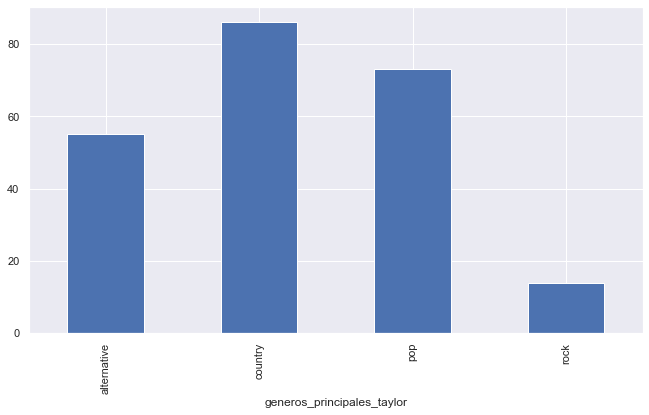

In [43]:
FeatureGenre_taylor.groupby('generos_principales_taylor').count()['title'].plot.bar()

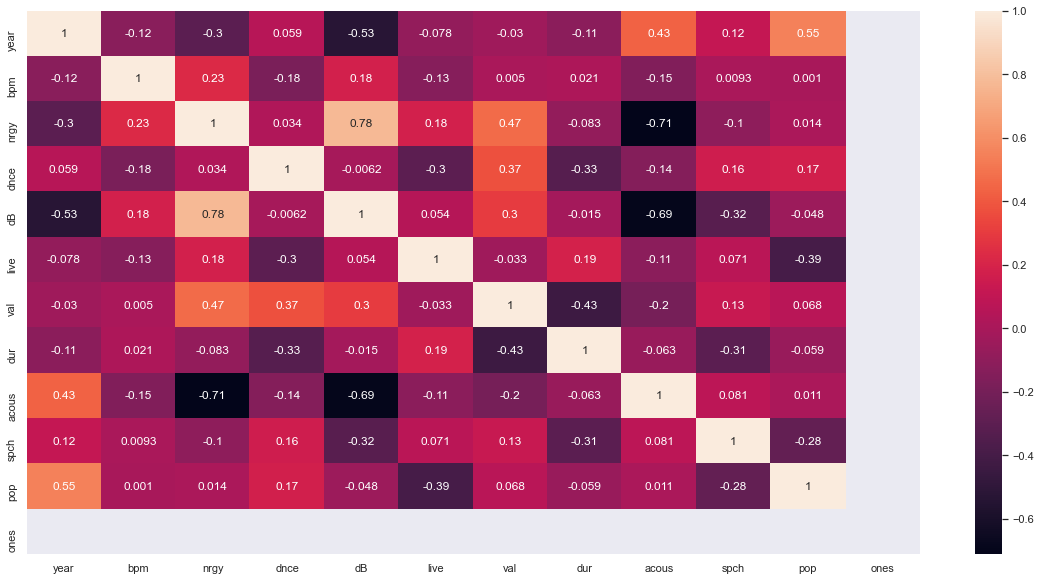

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df_taylor.corr(), annot=True)
plt.show()

In [46]:
df_taylor.corr(method ='kendall') 

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones
year,1.000000,-0.089277,-0.224164,0.024228,-0.462740,-0.136966,-0.017072,-0.050798,0.295691,0.217892,0.440363,NaN
bpm,-0.089277,1.000000,0.167189,-0.095446,0.132293,-0.024866,0.003018,0.035643,-0.097969,0.141629,-0.010112,NaN
nrgy,-0.224164,0.167189,1.000000,0.027990,0.602299,0.122992,0.328622,-0.096174,-0.517463,0.164379,-0.034631,NaN
dnce,0.024228,-0.095446,0.027990,1.000000,-0.005974,-0.121087,0.276808,-0.237293,-0.065867,0.105123,0.140627,NaN
dB,-0.462740,0.132293,0.602299,-0.005974,1.000000,0.131074,0.220433,-0.040419,-0.493975,-0.052566,-0.155487,NaN
live,-0.136966,-0.024866,0.122992,-0.121087,0.131074,1.000000,0.006417,0.018054,-0.084264,-0.021122,-0.243019,NaN
val,-0.017072,0.003018,0.328622,0.276808,0.220433,0.006417,1.000000,-0.312333,-0.139857,0.154760,0.064903,NaN
dur,-0.050798,0.035643,-0.096174,-0.237293,-0.040419,0.018054,-0.312333,1.000000,-0.003020,-0.234979,-0.078535,NaN
acous,0.295691,-0.097969,-0.517463,-0.065867,-0.493975,-0.084264,-0.139857,-0.003020,1.000000,-0.063163,0.040906,NaN
spch,0.217892,0.141629,0.164379,0.105123,-0.052566,-0.021122,0.154760,-0.234979,-0.063163,1.000000,0.152851,NaN


In [47]:
df_taylor.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,ones
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0
mean,2014.048246,121.026316,56.153509,57.399123,-7.543860,21.425439,40.241228,239.052632,37.456140,5.925439,57.030702,1.0
std,5.036636,31.753167,20.531873,12.287790,2.913255,23.012899,19.058423,47.167868,34.691882,9.278779,14.610175,0.0
min,2006.000000,58.000000,12.000000,24.000000,-18.000000,3.000000,5.000000,83.000000,0.000000,2.000000,0.000000,1.0
25%,2010.000000,95.000000,41.000000,50.000000,-9.000000,10.000000,25.000000,211.000000,4.750000,3.000000,47.000000,1.0
50%,2014.000000,119.000000,57.500000,59.000000,-7.000000,12.000000,39.000000,234.500000,20.500000,4.000000,56.000000,1.0
75%,2020.000000,144.000000,73.000000,65.000000,-5.000000,19.250000,53.000000,260.000000,73.250000,5.000000,69.000000,1.0
max,2021.000000,207.000000,94.000000,90.000000,-2.000000,98.000000,94.000000,405.000000,97.000000,91.000000,86.000000,1.0


In [48]:
df_dummys = pd.get_dummies(df, columns = ['artist'])

In [49]:
df_dummys

,title,genre,year,bpm,nrgy,dnce,dB,live,val,dur,...,artist_lil aaron,artist_lildeath,"artist_merci, mercy",artist_mimi bay,artist_rRoxymore,artist_renforshort,artist_salvia palth,artist_t.A.T.u.,artist_tiffi,artist_will.i.am
0,Welcome To New York,Synth Pop,2014,117,63,79,-5,30,62,213,...,0,0,0,0,0,0,0,0,0,0
1,Blank Space,Electropop,2014,96,70,76,-5,9,57,232,...,0,0,0,0,0,0,0,0,0,0
2,Style,Synth Pop,2014,95,79,59,-6,12,49,231,...,0,0,0,0,0,0,0,0,0,0
3,Out Of The Woods,Synth Pop,2014,92,84,55,-7,34,34,236,...,0,0,0,0,0,0,0,0,0,0
4,All You Had To Do Was Stay,Pop,2014,97,74,60,-6,11,47,193,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,La Culpable,dance pop,2020,94,61,82,-8,17,66,210,...,0,0,0,0,0,0,0,0,0,0
3091,Subliminal,dance pop,2019,119,49,64,-11,10,39,204,...,0,0,0,0,0,0,0,0,0,0
3092,Girls Just Wanna Have Fun (In the style of Cyn...,dance pop,2008,122,73,68,-11,38,91,182,...,0,0,0,0,0,0,0,0,0,0
3093,Metaphor - Demo,dance pop,2020,175,89,25,-8,17,53,237,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y = df_dummys['artist_Taylor Swift']

In [51]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: artist_Taylor Swift, dtype: uint8

In [52]:
X = df_dummys[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop','year']]

In [53]:
X.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year
0,117,63,79,-5,30,62,213,4,3,60,2014
1,96,70,76,-5,9,57,232,10,5,78,2014
2,95,79,59,-6,12,49,231,0,4,70,2014
3,92,84,55,-7,34,34,236,0,4,65,2014
4,97,74,60,-6,11,47,193,0,3,60,2014


In [54]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.25, random_state=77)

In [55]:
x_train.shape

(2321, 11)

In [56]:
x_test.shape

(774, 11)

# Árbol de decisión

In [57]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [58]:
t = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=3)

In [59]:
model = t.fit(x_train, y_train)

In [60]:
predictions = t.predict(x_test)

In [61]:
model.score(x_test,y_test)

0.9263565891472868

In [75]:
dimensiones = (15,20)

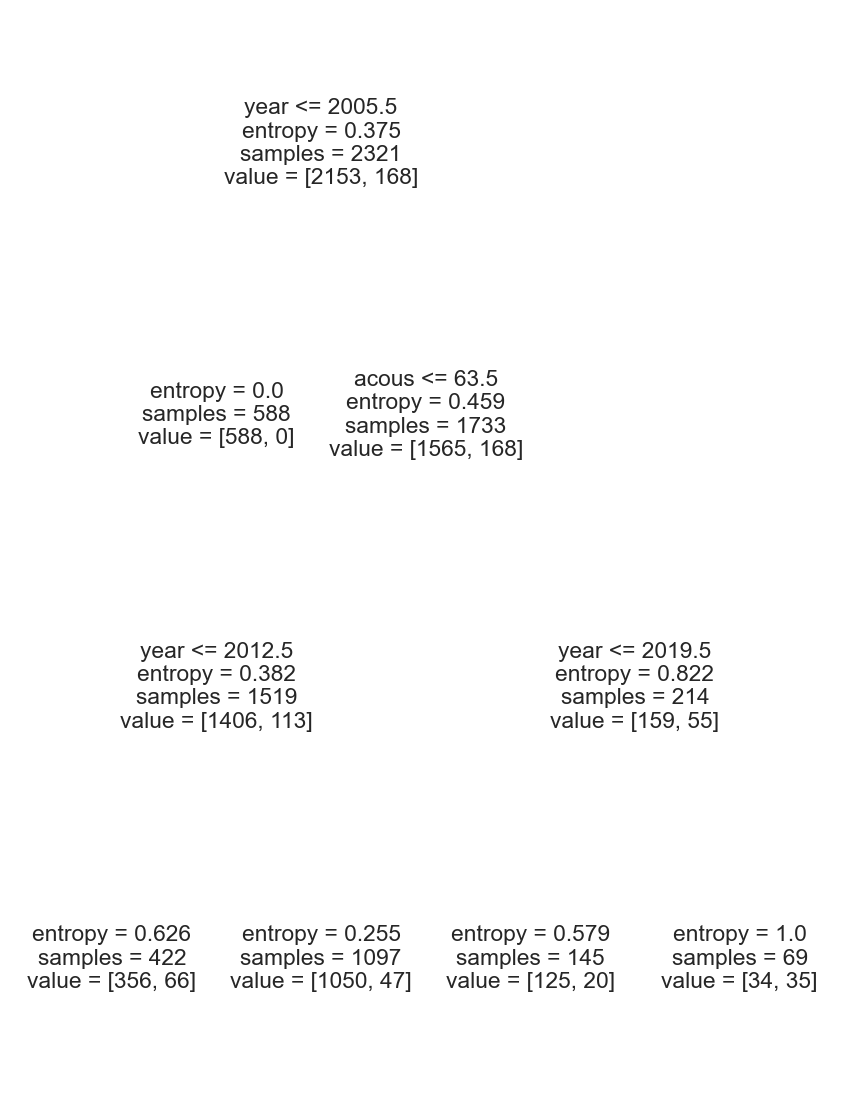

In [76]:
fig, ax = plt.subplots(figsize=dimensiones)
tree.plot_tree(t, feature_names= X.columns)
plt.show()

In [64]:
fig.savefig('tree.jpg')

# Matriz de confusión

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       714
           1       0.57      0.22      0.31        60

    accuracy                           0.93       774
   macro avg       0.75      0.60      0.64       774
weighted avg       0.91      0.93      0.91       774



In [81]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_test,y_pred)

0.6013305322128852